In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('deep')

In [3]:
def load_data(filepath):
    return pd.read_csv(filepath, sep="|", low_memory=False)

In [4]:
df = load_data("../data/raw/MachineLearningRating_v3.txt")

numeric_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']
categorical_cols = ['Gender', 'Province', 'VehicleType']
print("File loaded with shape:", df.shape)

File loaded with shape: (1000098, 52)


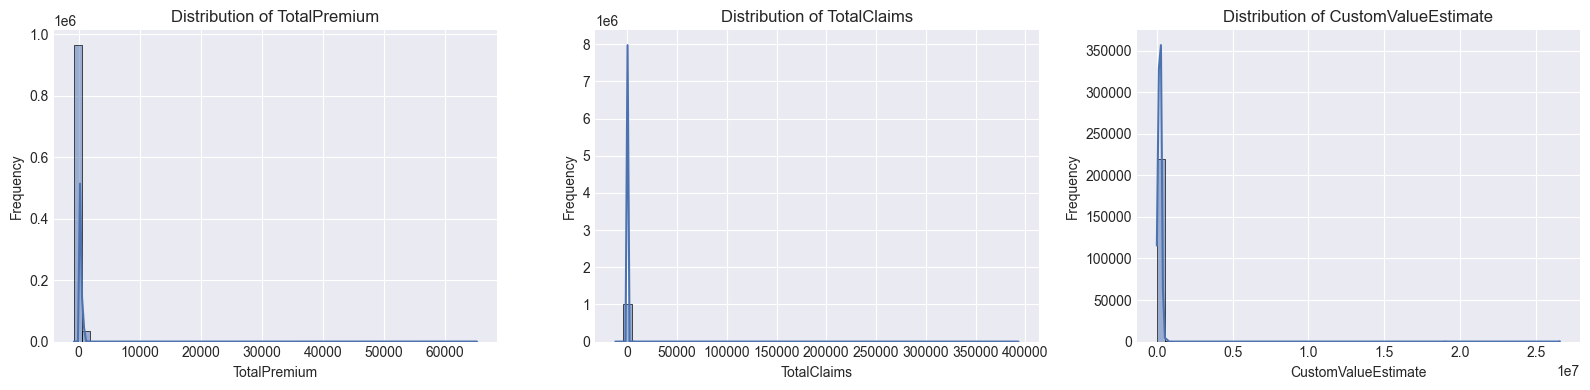

In [5]:
def plot_histograms(num_cols):
    num_plots = len(num_cols)
    fig, axes = plt.subplots(1, num_plots, figsize=(16, 4))

    for i, col in enumerate(num_cols):
        sns.histplot(df[col].dropna(), ax=axes[i], bins=50, kde=True)
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()


plot_histograms(numeric_cols)

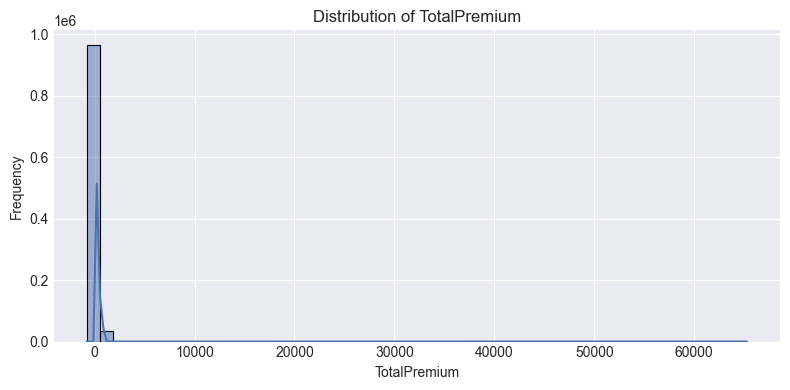

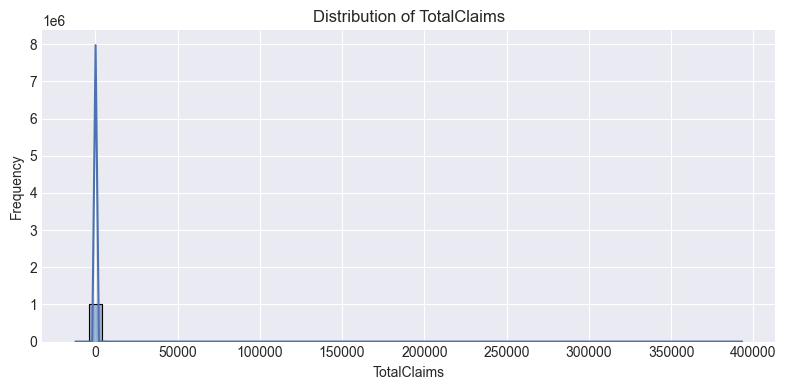

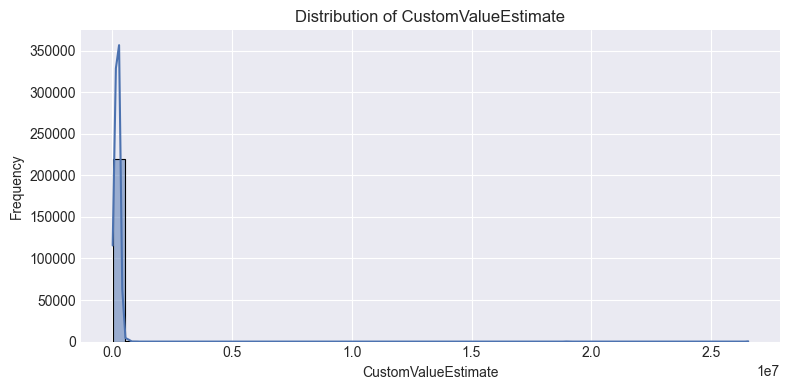

In [12]:
def plot_histograms(df, num_cols, output_dir="../figures"):
    os.makedirs(output_dir, exist_ok=True)
    for col in num_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col].dropna(), bins=50, kde=True)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.tight_layout()
        # plt.savefig(f"{output_dir}/hist_{col}.png")
        plt.show()
        plt.close()

plot_histograms(df, numeric_cols)

In [15]:
print("TotalPremium - Max:", max(df["TotalPremium"]))
print("TotalPremium - Min:", min(df["TotalPremium"]))
print("TotalPremium - Mean:", df["TotalPremium"].mean())
print("TotalPremium - Std:", df["TotalPremium"].std())

TotalPremium - Max: 65282.6034210526
TotalPremium - Min: -782.576754385965
TotalPremium - Mean: 61.90549595782838
TotalPremium - Std: 230.28451275764215


In [16]:
print("TotalClaims - Max:", max(df["TotalClaims"]))
print("TotalClaims - Min:", min(df["TotalClaims"]))
print("TotalClaims - Mean:", df["TotalClaims"].mean())
print("TotalClaims - Std:", df["TotalClaims"].std())

TotalClaims - Max: 393092.105263158
TotalClaims - Min: -12002.412280701796
TotalClaims - Mean: 64.86118977410389
TotalClaims - Std: 2384.0746945015203


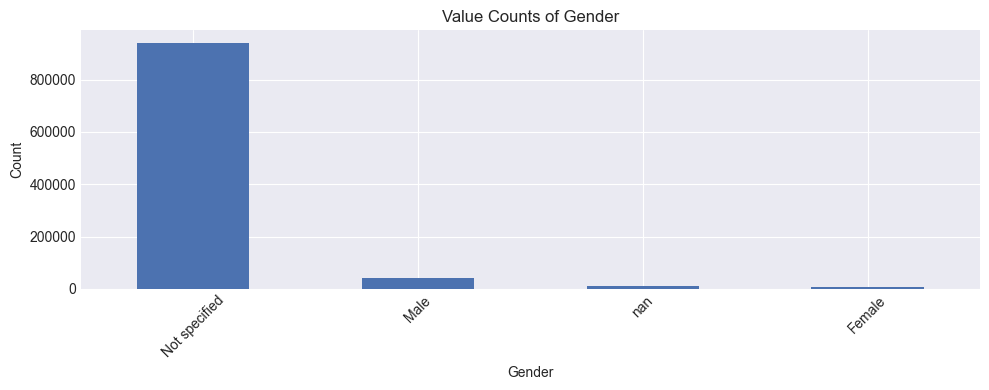

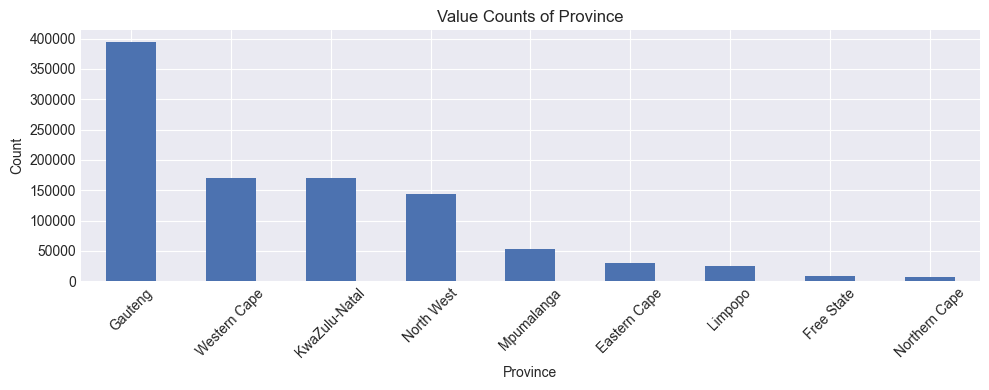

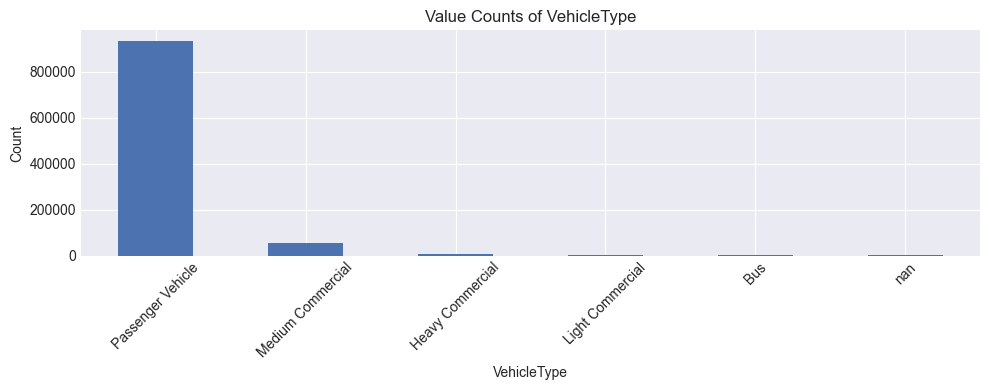

In [ ]:
def plot_bar_counts(df, cat_cols, output_dir="../figures"):
    # os.makedirs(output_dir, exist_ok=True)
    for col in cat_cols:
        # if df[col].nunique() < 25:  # Skip too-many-category columns
            plt.figure(figsize=(10, 4))
            df[col].value_counts(dropna=False).plot(kind="bar")
            plt.title(f"Value Counts of {col}")
            plt.ylabel("Count")
            plt.xticks(rotation=45)
            plt.tight_layout()
            # plt.savefig(f"{output_dir}/bar_{col}.png")
            plt.show()
            plt.close()


plot_bar_counts(df, categorical_cols)

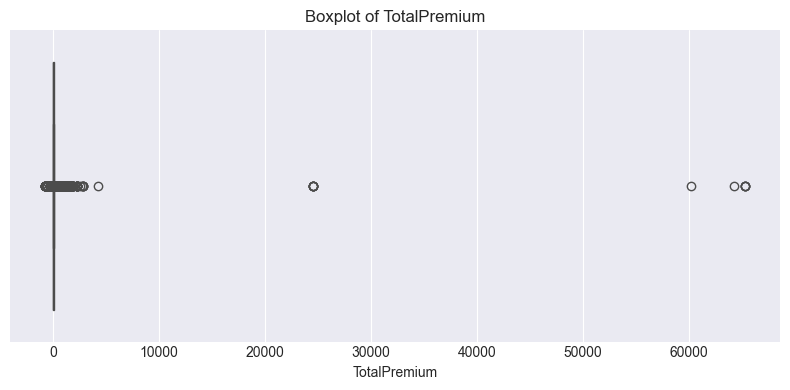

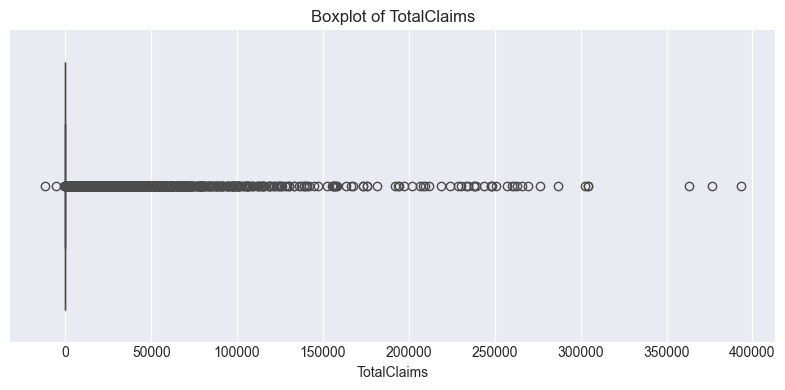

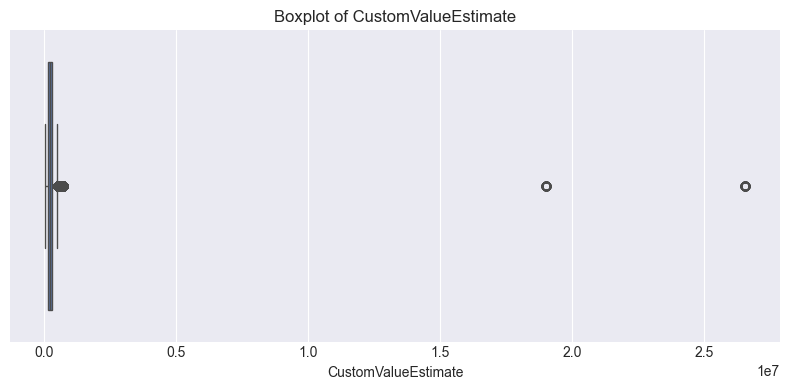

In [19]:
def plot_boxplots(df, cols_to_check, output_dir="../figures"):
    os.makedirs(output_dir, exist_ok=True)
    for col in cols_to_check:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.tight_layout()
        plt.savefig(f"{output_dir}/box_{col}.png")
        plt.show()
        plt.close()
        
plot_boxplots(df, numeric_cols)

In [ ]:
def plot_loss_ratio(df, groupby_col, output_dir="../figures"):
    os.makedirs(output_dir, exist_ok=True)
    loss_df = df.groupby(groupby_col).agg({"TotalClaims": "sum", "TotalPremium": "sum"})
    loss_df = loss_df[loss_df.TotalPremium > 0]  # avoid div by zero
    loss_df["LossRatio"] = loss_df["TotalClaims"] / loss_df["TotalPremium"]
    loss_df = loss_df.sort_values("LossRatio", ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=loss_df.index, y=loss_df.LossRatio)
    plt.title(f"Loss Ratio by {groupby_col}")
    plt.ylabel("Loss Ratio")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/loss_ratio_{groupby_col}.png")
    plt.show()
    plt.close()

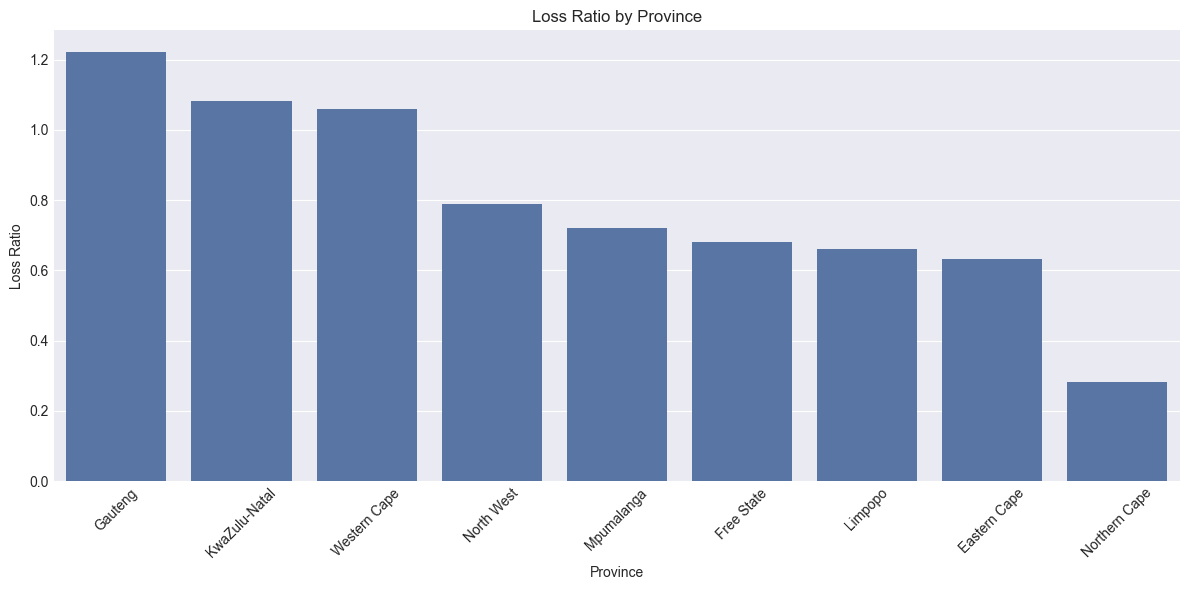

In [23]:
plot_loss_ratio(df, groupby_col="Province")

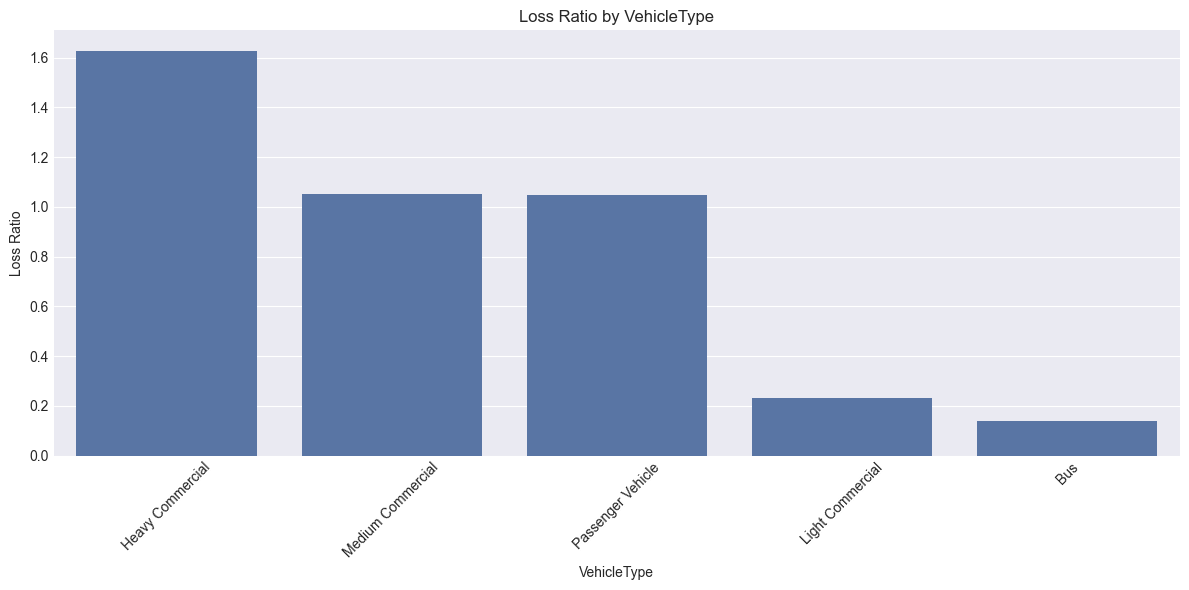

In [27]:
plot_loss_ratio(df, groupby_col="VehicleType")

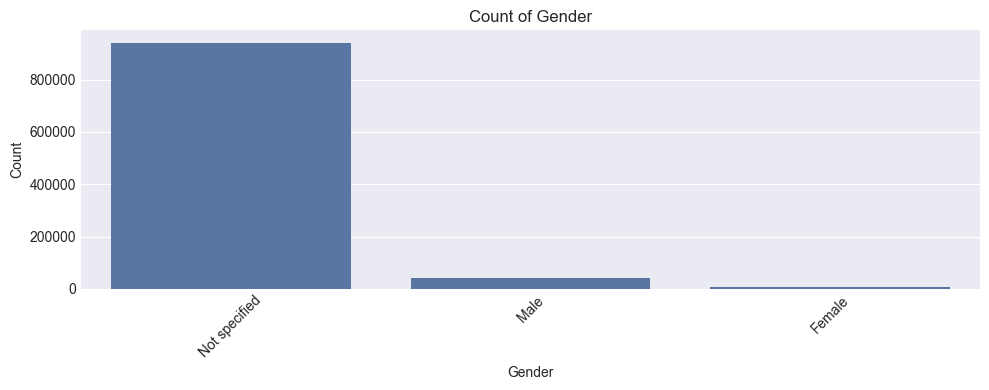

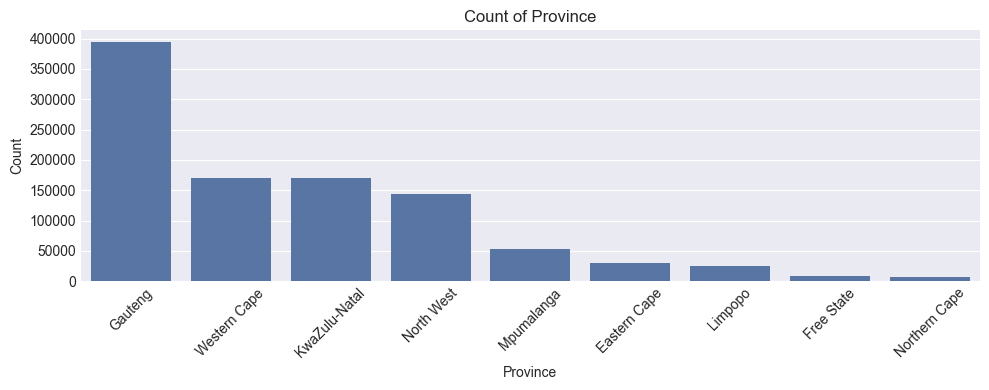

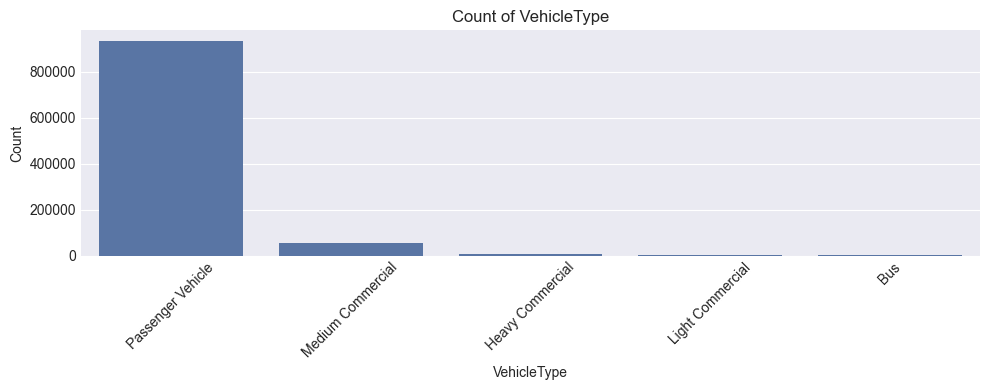

In [26]:
def plot_categorical_counts(cat_cols):
    for col in cat_cols:
        plt.figure(figsize=(10, 4))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f"Count of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        plt.close()

plot_categorical_counts(categorical_cols)

In [32]:
df.TransactionMonth

0          2015-03-01 00:00:00
1          2015-05-01 00:00:00
2          2015-07-01 00:00:00
3          2015-05-01 00:00:00
4          2015-07-01 00:00:00
                  ...         
1000093    2015-04-01 00:00:00
1000094    2015-06-01 00:00:00
1000095    2015-08-01 00:00:00
1000096    2014-07-01 00:00:00
1000097    2015-02-01 00:00:00
Name: TransactionMonth, Length: 1000098, dtype: object